In [1]:
#import packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import scipy.stats as stats

In [5]:
#import data
users = pd.read_csv('takehome_users.csv', encoding = 'ISO-8859-1')
user_egg = pd.read_csv('takehome_user_engagement.csv', encoding = 'ISO-8859-1')

In [12]:
ProfileReport(users)

In [30]:
#data cleaning
from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder

In [17]:
#creation time to dt
users['creation_time'] = pd.to_datetime(users['creation_time'])

In [24]:
#creation source one hot encoding
oh = OneHotEncoder(use_cat_names=True, cols='creation_source')
users = oh.fit_transform(users)

In [28]:
#drop unnecessary cols
users = users.drop(['name', 'email'], axis=1)

In [33]:
#fill missing values
users['last_session_creation_time'] = users['last_session_creation_time'].fillna(users['last_session_creation_time'].median())

In [35]:
users['invited_by_user_id'] = users['invited_by_user_id'].fillna(0)

In [36]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
object_id                             12000 non-null int64
creation_time                         12000 non-null datetime64[ns]
creation_source_GUEST_INVITE          12000 non-null int64
creation_source_ORG_INVITE            12000 non-null int64
creation_source_SIGNUP                12000 non-null int64
creation_source_PERSONAL_PROJECTS     12000 non-null int64
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null int64
last_session_creation_time            12000 non-null float64
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
org_id                                12000 non-null int64
invited_by_user_id                    12000 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(9)
memory usage: 1.1 MB


In [ ]:
#exploratory

In [41]:
users['creation_time_hour'] = users['creation_time'].dt.hour
users['creation_time_day'] = users['creation_time'].dt.day
users['creation_time_month'] = users['creation_time'].dt.month
users['creation_time_wkday'] = users['creation_time'].dt.dayofweek

In [53]:
#creation source by hour - weekday
byhd = users.groupby([users['creation_time_hour'], users['creation_time_wkday']]).count()

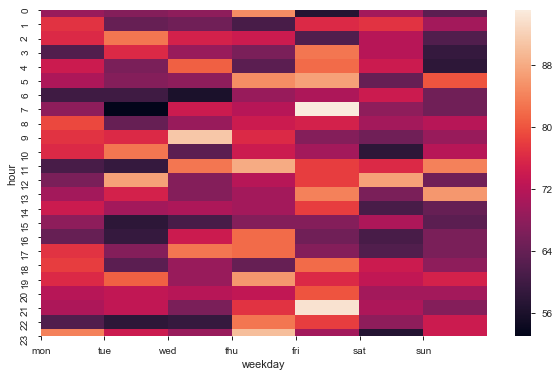

In [59]:
#hour - dayofweek
#guest
hdguestheat = plt.figure(figsize=(10, 6))
hdguestheat = sns.heatmap(byhd['creation_source_GUEST_INVITE'].unstack())
hdguestheat = plt.xlabel('weekday')
hdguestheat = plt.ylabel('hour')
hdguestheat = plt.xticks(np.arange(7), ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])

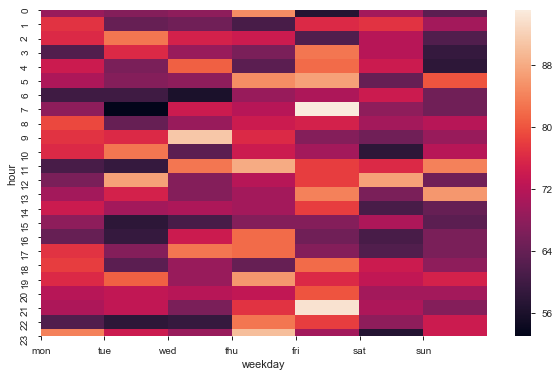

In [61]:
#org
hdorgheat = plt.figure(figsize=(10, 6))
hdorgheat = sns.heatmap(byhd['creation_source_ORG_INVITE'].unstack())
hdorgheat = plt.xlabel('weekday')
hdorgheat = plt.ylabel('hour')
hdorgheat = plt.xticks(np.arange(7), ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])

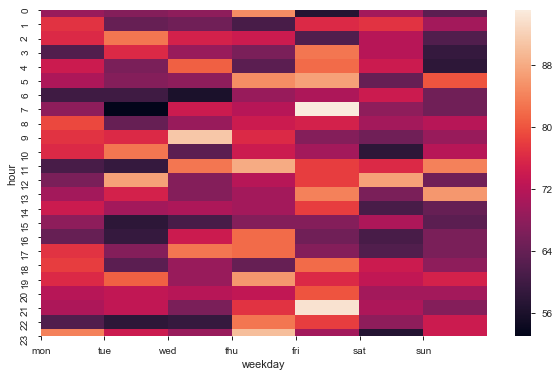

In [62]:
#personal
hdpsheat = plt.figure(figsize=(10, 6))
hdpsheat = sns.heatmap(byhd['creation_source_PERSONAL_PROJECTS'].unstack())
hdpsheat = plt.xlabel('weekday')
hdpsheat = plt.ylabel('hour')
hdpsheat = plt.xticks(np.arange(7), ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])

In [66]:
#day - month
bydm = users.groupby([users['creation_time_day'], users['creation_time_month']]).count()

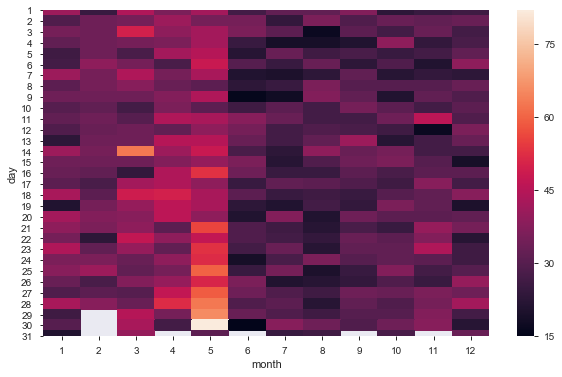

In [70]:
#guest
dmguestheat = plt.figure(figsize=(10, 6))
dmguestheat = sns.heatmap(bydm['creation_source_GUEST_INVITE'].unstack())
dmguestheat = plt.xlabel('month')
dmguestheat = plt.ylabel('day')

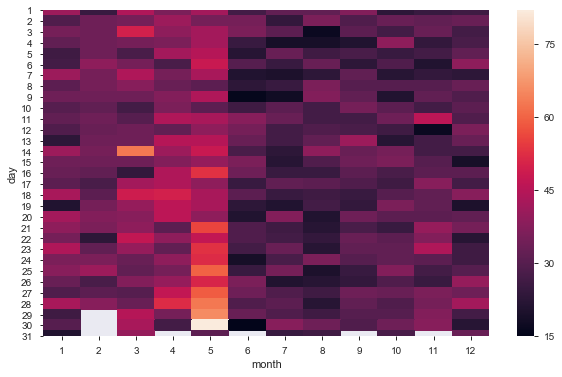

In [71]:
#org
dmorgheat = plt.figure(figsize=(10, 6))
dmorgheat = sns.heatmap(bydm['creation_source_ORG_INVITE'].unstack())
dmorgheat = plt.xlabel('month')
dmorgheat = plt.ylabel('day')

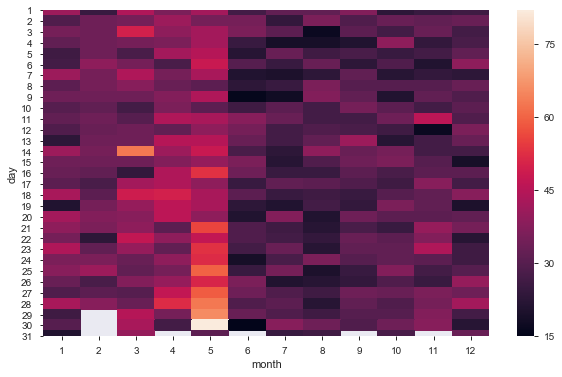

In [72]:
#personal
dmpsheat = plt.figure(figsize=(10, 6))
dmpsheat = sns.heatmap(bydm['creation_source_PERSONAL_PROJECTS'].unstack())
dmpsheat = plt.xlabel('month')
dmpsheat = plt.ylabel('day')

In [ ]:
#no clear correaltions from plots

In [42]:
ProfileReport(users)

In [183]:
#adapted users: 3 seperate days in at least 1 7d period
#timestamp to dt
user_egg['time_stamp'] = pd.to_datetime(user_egg['time_stamp'])
user_egg['day'] = user_egg['time_stamp'].dt.floor('d').astype(np.int64)

In [193]:
times = user_egg.groupby('user_id')['day'].rolling(window=3)
diff = pd.to_timedelta(times.max() - times.min()).dt.days
diff

user_id        
1        0          NaN
2        1          NaN
         2          NaN
         3         24.0
         4         26.0
                   ... 
11996    207912     NaN
11997    207913     NaN
11998    207914     NaN
11999    207915     NaN
12000    207916     NaN
Name: day, Length: 207917, dtype: float64

In [210]:
adopted = diff[(diff<=7) & (diff>=3)].index.get_level_values('user_id').tolist()
adopted

[2,
 2,
 2,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 33,
 33,
 33,
 33,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42

In [211]:
adopted = list(set(adopted))

In [212]:
adopted

[8192,
 2,
 8196,
 8201,
 10,
 8214,
 8217,
 8220,
 8221,
 33,
 8232,
 8233,
 42,
 43,
 8235,
 50,
 8243,
 53,
 60,
 8252,
 63,
 8255,
 8258,
 8259,
 69,
 8265,
 74,
 8270,
 80,
 81,
 82,
 8277,
 8278,
 87,
 8280,
 8294,
 8297,
 8310,
 8311,
 8319,
 133,
 135,
 141,
 8334,
 146,
 153,
 8348,
 160,
 165,
 168,
 172,
 174,
 8366,
 8371,
 185,
 188,
 8381,
 8383,
 197,
 200,
 8393,
 202,
 203,
 8394,
 8399,
 209,
 8401,
 8403,
 214,
 8408,
 8415,
 230,
 8426,
 8435,
 245,
 247,
 8440,
 8442,
 8448,
 263,
 265,
 8460,
 8463,
 8466,
 275,
 280,
 283,
 297,
 298,
 8493,
 305,
 310,
 311,
 8505,
 8507,
 8508,
 8511,
 321,
 322,
 8523,
 341,
 345,
 8538,
 347,
 351,
 8553,
 362,
 363,
 370,
 8569,
 8571,
 383,
 8581,
 397,
 401,
 8593,
 8595,
 8601,
 8602,
 418,
 8615,
 430,
 8622,
 445,
 8639,
 8640,
 450,
 460,
 462,
 8654,
 469,
 471,
 472,
 478,
 479,
 8673,
 483,
 8675,
 8677,
 8679,
 492,
 494,
 497,
 8689,
 502,
 8695,
 506,
 509,
 510,
 8701,
 512,
 8704,
 8706,
 8708,
 518,
 520,
 871

In [214]:
users['adopted'] = 0

In [215]:
for m in range(len(users)):
    if users['object_id'][m] in adopted:
        users['adopted'][m] = 1

In [217]:
users.head()

object_id       creation_time  creation_source_GUEST_INVITE  \
0          1 2014-04-22 03:53:30                             1   
1          2 2013-11-15 03:45:04                             0   
2          3 2013-03-19 23:14:52                             0   
3          4 2013-05-21 08:09:28                             1   
4          5 2013-01-17 10:14:20                             1   

   creation_source_ORG_INVITE  creation_source_SIGNUP  \
0                           0                       0   
1                           1                       0   
2                           1                       0   
3                           0                       0   
4                           0                       0   

   creation_source_PERSONAL_PROJECTS  creation_source_SIGNUP_GOOGLE_AUTH  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   last_session_creation_time  opted_in_to_mailing_list  \
0                1.398139e+09                         1   
1                1.396238e+09                         0   
2                1.363735e+09                         0   
3                1.369210e+09                         0   
4                1.358850e+09                         0   

   enabled_for_marketing_drip  org_id  invited_by_user_id  creation_time_hour  \
0                           0      11             10803.0                   3   
1                           0       1               316.0                   3   
2                           0      94              1525.0                  23   
3                           0       1              5151.0                   8   
4                           0     193              5240.0                  10   

   creation_time_day  creation_time_month  creation_time_wkday  adopted  
0                 22                    4                    1        0  
1                 15                   11                    4        1  
2                 19                    3                    1        0  
3                 21                    5                    1        0  
4                 17                    1                    3        0

In [223]:
#adopted rate
users['adopted'].value_counts()[1]/users['adopted'].count()

0.137

In [224]:
ProfileReport(users)

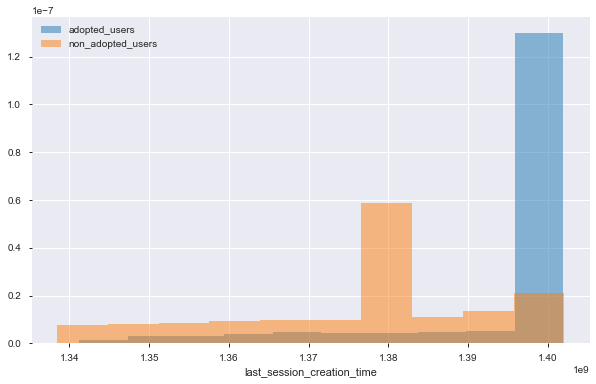

In [253]:
#last session creation time and adopted 
lastsessionhist = plt.figure(figsize=(10, 6))
lastsessionhist = plt.hist(users[users['adopted']==1]['last_session_creation_time'], normed=True, alpha=0.5, label='adopted_users')
lastsessionhist = plt.hist(users[users['adopted']==0]['last_session_creation_time'], normed=True, alpha=0.5, label='non_adopted_users')
lastsessionhist = plt.xlabel('last_session_creation_time')
lastsessionhist = plt.legend()
#there seems to be difference on last session creation time 

In [277]:
from category_encoders.ordinal import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2

In [271]:
X = users.copy().drop('adopted', axis=1)
Y = users['adopted']

In [272]:
ordencoder = OrdinalEncoder(verbose=0, cols='creation_time')
X = ordencoder.fit_transform(X, Y)

In [285]:
k = SelectKBest(chi2, k=10)
X_k = k.fit_transform(X, Y)
X_k

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0803e+04, 2.2000e+01,
        4.0000e+00],
       [2.0000e+00, 2.0000e+00, 0.0000e+00, ..., 3.1600e+02, 1.5000e+01,
        1.1000e+01],
       [3.0000e+00, 3.0000e+00, 0.0000e+00, ..., 1.5250e+03, 1.9000e+01,
        3.0000e+00],
       ...,
       [1.1998e+04, 1.1994e+04, 1.0000e+00, ..., 8.0740e+03, 2.7000e+01,
        4.0000e+00],
       [1.1999e+04, 1.1995e+04, 0.0000e+00, ..., 0.0000e+00, 3.1000e+01,
        5.0000e+00],
       [1.2000e+04, 1.1996e+04, 0.0000e+00, ..., 0.0000e+00, 2.6000e+01,
        1.0000e+00]])

In [283]:
k.scores_

array([5.30000781e+02, 4.64214048e+02, 1.84388386e+01, 1.90873669e-01,
       6.93470641e-01, 5.69356025e+01, 1.36368605e+01, 3.11962569e+08,
       7.07195684e-01, 3.40690198e-01, 5.89623290e+03, 2.73823071e+04,
       9.31115875e-05, 1.90857081e+01, 3.74924601e+01, 6.60712871e-01])